# 1.数据集加载

In [1]:
%load_ext autoreload
%autoreload 2

Number of x_train: 60000


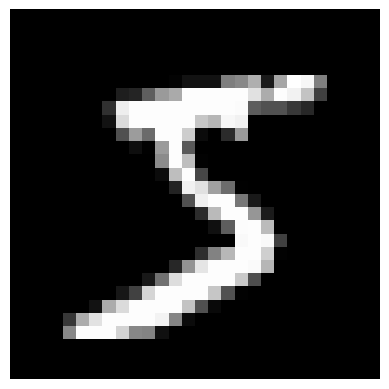

In [2]:
import numpy as np
import gzip
import matplotlib.pyplot as plt

# 读取数据集
def read_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)
    return data

def read_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

x_train = read_images('MNIST_data/train-images-idx3-ubyte.gz')
y_train = read_labels('MNIST_data/train-labels-idx1-ubyte.gz')
x_test = read_images('MNIST_data/t10k-images-idx3-ubyte.gz')
y_test = read_labels('MNIST_data/t10k-labels-idx1-ubyte.gz')

# 数据预处理
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
n_classes = 10
one_hot_y_train = np.eye(n_classes)[y_train]

print("Number of x_train:", x_train.shape[0])
example = x_train[0].reshape(28,28)
plt.imshow(example, cmap='gray')
plt.axis('off')
plt.show()

# 2.模型构建

Epoch 20, loss: 17.54696060911933
Epoch 40, loss: 15.552937489095243
Epoch 60, loss: 14.659383729003261
Epoch 80, loss: 14.366485387932034
Epoch 100, loss: 14.299220554883162
Epoch 120, loss: 14.288635206820306
Epoch 140, loss: 14.287507146830162
Epoch 160, loss: 14.287425917060345
Epoch 180, loss: 14.287421967849781
Epoch 200, loss: 14.287421838319409


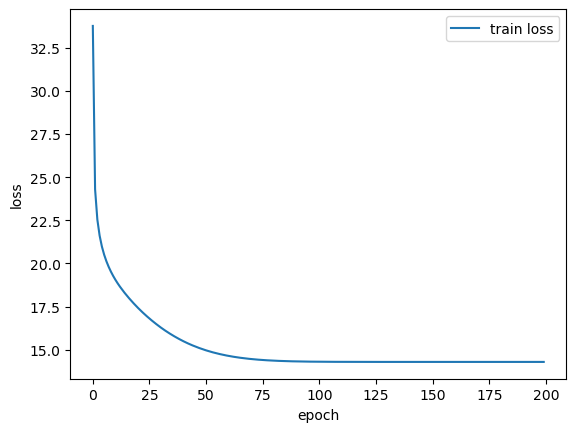

In [3]:
from Runner import Runner
from Model_L2 import Model_L2
import matplotlib.pyplot as plt

# 模型构建
hidden_size = 50 # 隐藏层维度
reg = 0.001 # 正则化强度
nn = Model_L2(784, hidden_size, 10, reg)

epochs = 200
batch_size = 32
learning_rate = 0.1 # 初始学习率
runner = Runner(nn, epochs, batch_size, learning_rate)

# 模型训练
x_train_1 = x_train[:40000]
y_train_1 = one_hot_y_train[:40000]
train_losses = runner.train(x_train_1, y_train_1)

# 绘制loss曲线
plt.plot(train_losses, label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 3.模型预测

In [4]:
y_test_pred, _ = nn.forward(x_test)
label = np.argmax(y_test_pred, axis=1)
accuracy = np.mean(label == y_test) * 100
print('测试集准确率: {:.2f}%'.format(accuracy))

测试集准确率: 86.65%


# 4.参数查找

In [5]:
import numpy as np

# 交叉验证
def k_fold_cross_validation(X, y, k, i):
    n = X.shape[0]
    fold_size = n // k
    val_start, val_end = i * fold_size, (i+1) * fold_size
    X_val, y_val = X[val_start:val_end], y[val_start:val_end]
    X_train = np.vstack((X[:val_start], X[val_end:]))
    y_train = np.concatenate((y[:val_start], y[val_end:]))

    return X_train, y_train, X_val, y_val

# 较优学习率，隐藏层大小，正则化强度查找
learning_rate_list = [0.1, 0.01, 0.001]
hidden_size_list = [50, 100, 200]
reg_list = [0.01, 0.001, 0.0001]

params_list = []
for lr in learning_rate_list:
    for hs in hidden_size_list:
        for reg in reg_list:
            params_list.append((lr, hs, reg))

best_params = None
best_acc = -1
k = 3

# 网格搜索
for params in params_list:
    acc = 0
    print('====learning_rate = %.5f, hidden_size = %d, reg = %.5f====' % params)
    for i in range(k):
        epochs = 200
        batch_size = 64
        nn = Model_L2(784, params[1], 10, params[2])
        runner = Runner(nn, epochs, batch_size, params[0])
        
        # 训练集
        X_train_2, y_train_2, X_val_2, y_val_2 = k_fold_cross_validation(x_train, one_hot_y_train, k, i)
        train_losses = runner.train(X_train_2, y_train_2)
        
        # 验证集
        y_val_pred, _ = nn.forward(X_val_2)
        label_val_pred = np.argmax(y_val_pred, axis=1)
        label_val = np.argmax(y_val_2, axis=1)
        acc += np.mean(label_val_pred == label_val)

    if acc > best_acc:
        best_params = params
        best_acc = acc

print('最优参数: learning_rate = %.5f, hidden_size = %d, reg = %.5f' % best_params)

====learning_rate = 0.10000, hidden_size = 50, reg = 0.01000====
Epoch 20, loss: 137.30842752419306
Epoch 40, loss: 102.86002841247495
Epoch 60, loss: 88.99945909470708
Epoch 80, loss: 84.69812343468806
Epoch 100, loss: 83.72917475500508
Epoch 120, loss: 83.5777810670876
Epoch 140, loss: 83.56169070958651
Epoch 160, loss: 83.56053403021204
Epoch 180, loss: 83.56047788254767
Epoch 200, loss: 83.56047604379458
Epoch 20, loss: 138.14726696823294
Epoch 40, loss: 103.49952436993144
Epoch 60, loss: 89.54485138159103
Epoch 80, loss: 85.21388372130095
Epoch 100, loss: 84.23828583883055
Epoch 120, loss: 84.08585463580008
Epoch 140, loss: 84.06965396331579
Epoch 160, loss: 84.0684893542639
Epoch 180, loss: 84.06843282172578
Epoch 200, loss: 84.06843097036945
Epoch 20, loss: 136.6073913883838
Epoch 40, loss: 102.27989704792994
Epoch 60, loss: 88.46337869184121
Epoch 80, loss: 84.17795133761823
Epoch 100, loss: 83.21278942560048
Epoch 120, loss: 83.06199053513333
Epoch 140, loss: 83.04596301362626

Epoch 20, loss: 79.93806948565033
Epoch 40, loss: 76.57934171767441
Epoch 60, loss: 75.14211314456477
Epoch 80, loss: 74.67210474031198
Epoch 100, loss: 74.56407917823769
Epoch 120, loss: 74.54708409051452
Epoch 140, loss: 74.54527192286322
Epoch 160, loss: 74.54514131340034
Epoch 180, loss: 74.54513495727072
Epoch 200, loss: 74.54513474859141
Epoch 20, loss: 80.18434720056692
Epoch 40, loss: 76.69252165215978
Epoch 60, loss: 75.22398811768065
Epoch 80, loss: 74.74658484680043
Epoch 100, loss: 74.63701893311604
Epoch 120, loss: 74.61978836609043
Epoch 140, loss: 74.61795117381318
Epoch 160, loss: 74.61781875187191
Epoch 180, loss: 74.61781230715259
Epoch 200, loss: 74.61781209555184
====learning_rate = 0.10000, hidden_size = 200, reg = 0.00010====
Epoch 20, loss: 11.958240094068062
Epoch 40, loss: 10.70717862488416
Epoch 60, loss: 10.323265020421735
Epoch 80, loss: 10.21019135206605
Epoch 100, loss: 10.184859881401854
Epoch 120, loss: 10.180875492430157
Epoch 140, loss: 10.180447829140

Epoch 40, loss: 12.484126404724643
Epoch 60, loss: 11.47387896704655
Epoch 80, loss: 11.195743204447481
Epoch 100, loss: 11.134806443246607
Epoch 120, loss: 11.125335293126112
Epoch 140, loss: 11.124328827412166
Epoch 160, loss: 11.124256419998941
Epoch 180, loss: 11.124252902131854
Epoch 200, loss: 11.124252786827608
====learning_rate = 0.01000, hidden_size = 200, reg = 0.01000====


C:\Users\Asterion\Desktop\sort_minist\Model_L2.py:34: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y * np.log(y_pred))/X.shape[0]
C:\Users\Asterion\Desktop\sort_minist\Model_L2.py:34: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y * np.log(y_pred))/X.shape[0]


Epoch 20, loss: 774.4318090401086
Epoch 40, loss: 747.3436049704286
Epoch 60, loss: 735.2670960023011
Epoch 80, loss: 731.2544534333814
Epoch 100, loss: 730.33004021937
Epoch 120, loss: 730.1848795353123
Epoch 140, loss: 730.1694388631979
Epoch 160, loss: 730.1683287133204
Epoch 180, loss: 730.1682748197005
Epoch 200, loss: 730.1682730546215
Epoch 20, loss: 778.1380855945412
Epoch 40, loss: 752.435941880154
Epoch 60, loss: 740.6189887228751
Epoch 80, loss: 736.6697749095962
Epoch 100, loss: 735.7585277281822
Epoch 120, loss: 735.6153908153191
Epoch 140, loss: 735.6001649073294
Epoch 160, loss: 735.5990701954396
Epoch 180, loss: 735.5990170513476
Epoch 200, loss: 735.5990153108179
Epoch 20, loss: 778.2415838552212
Epoch 40, loss: 751.9311710022481
Epoch 60, loss: 739.968252749788
Epoch 80, loss: 735.9826970535757
Epoch 100, loss: 735.0637043617721
Epoch 120, loss: 734.9193684160119
Epoch 140, loss: 734.9040151308016
Epoch 160, loss: 734.9029112642246
Epoch 180, loss: 734.9028576758838
E

Epoch 80, loss: 67.11037695396557
Epoch 100, loss: 66.92234161878378
Epoch 120, loss: 66.89300201240727
Epoch 140, loss: 66.88988404913128
Epoch 160, loss: 66.88965989827697
Epoch 180, loss: 66.88964901677264
Epoch 200, loss: 66.88964866039271
Epoch 20, loss: 88.15423033594007
Epoch 40, loss: 77.66379436276117
Epoch 60, loss: 74.18574320402804
Epoch 80, loss: 73.13828735941568
Epoch 100, loss: 72.90400643747209
Epoch 120, loss: 72.8674532217764
Epoch 140, loss: 72.86356890299366
Epoch 160, loss: 72.86328966363847
Epoch 180, loss: 72.86327610813346
Epoch 200, loss: 72.8632756641875
====learning_rate = 0.00100, hidden_size = 100, reg = 0.00010====
Epoch 20, loss: 52.02940862443488
Epoch 40, loss: 42.30863064303018
Epoch 60, loss: 38.7311006069987
Epoch 80, loss: 37.64187781718356
Epoch 100, loss: 37.397652898060024
Epoch 120, loss: 37.35953658186128
Epoch 140, loss: 37.35548592206374
Epoch 160, loss: 37.35519472654764
Epoch 180, loss: 37.35518059065429
Epoch 200, loss: 37.355180127703704

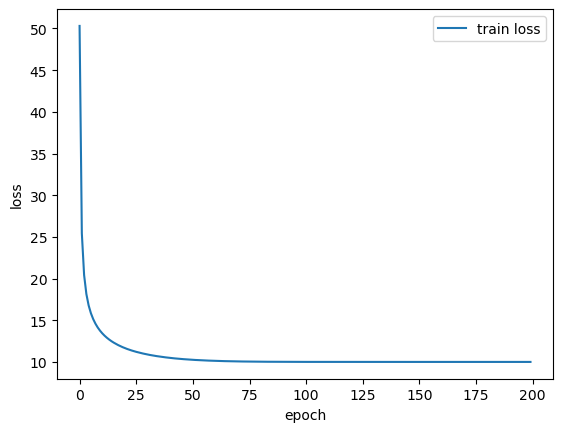

In [12]:
plt.plot(train_losses, label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
import numpy as np

# 验证测试集准确率
epochs = 200
batch_size = 64
nn = Model_L2(784, best_params[1], 10, best_params[2])
runner = Runner(nn, epochs, batch_size, best_params[0])

x_train_1 = x_train[:40000]
y_train_1 = one_hot_y_train[:40000]
train_losses = runner.train(x_train_1, y_train_1)

y_test_pred, _ = nn.forward(x_test)
label = np.argmax(y_test_pred, axis=1)
accuracy = np.mean(label == y_test) * 100
print('测试集准确率: {:.2f}%'.format(accuracy))

Epoch 20, loss: 11.78206927010445
Epoch 40, loss: 10.524287480921393
Epoch 60, loss: 10.148798056128697
Epoch 80, loss: 10.040901925678932
Epoch 100, loss: 10.016687746444935
Epoch 120, loss: 10.012872677264356
Epoch 140, loss: 10.012462712491226
Epoch 160, loss: 10.012432921018876
Epoch 180, loss: 10.012431459450433
Epoch 200, loss: 10.012431411080197
测试集准确率: 88.62%


# 5.模型保存

In [7]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(nn, f)